In [38]:
%matplotlib inline 
# Make plots appear inside the notebook

# EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import missingno as msno 

# Models from Scikit-Learn
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Model evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# Import Cleaned Datasets

In [2]:
# df_dropped_empty_outliers.to_csv('df_dropped_empty_outliers.csv', index=False)
# df_filled_empty_outliers.to_csv('df_filled_empty_outliers.csv', index=False)
# df_filled_empty_outliers_dyn.to_csv('output.csv', index=False)
# df_filled_empty_outliers_dyn1.to_csv('df_filled_empty_outliers_dyn.csv', index=False)

df_dropped_empty_outliers = pd.read_csv("data/df_dropped_empty_outliers.csv", low_memory=False)
df_filled_empty_outliers = pd.read_csv("data/df_filled_empty_outliers.csv", low_memory=False)
df_filled_empty_outliers_dyn = pd.read_csv("data/df_filled_empty_outliers_dyn.csv", low_memory=False)

# Splitting Dataset

In [4]:
# Split data into X & y
X = df_dropped_empty_outliers.drop("price", axis=1)

y = df_dropped_empty_outliers['price']

In [5]:
X

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,7316814884,17,103,16,21506,3,7,3,57923.0,1,3,0,0,9,11,2
1,7316814758,17,99,9,21816,3,7,3,71229.0,1,3,0,0,9,2,2
2,7316814989,17,109,9,21860,3,7,3,19160.0,1,3,0,0,9,9,2
3,7316743432,17,106,41,24559,3,7,3,41124.0,1,3,0,0,9,9,2
4,7316356412,17,102,15,12770,1,6,3,128000.0,1,1,3,2,11,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371382,7301591192,398,108,33,17372,3,6,3,32226.0,1,3,2,0,10,0,51
371383,7301591187,398,109,43,20859,3,0,3,12029.0,1,3,2,0,10,9,51
371384,7301591147,398,109,8,25873,3,0,1,4174.0,1,3,0,0,5,11,51
371385,7301591140,398,107,25,11881,3,6,3,30112.0,1,3,2,0,10,10,51


In [6]:
y

0         33590
1         22590
2         39590
3         30990
4         15000
          ...  
371382    23590
371383    30590
371384    34990
371385    28990
371386    30590
Name: price, Length: 371387, dtype: int64

In [7]:
# Split data into train & test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
272350,7303088490,366,101,9,22037,0,0,3,206330.0,1,1,1,0,0,11,37
87241,7304803140,182,103,9,22004,3,7,3,53263.0,1,3,0,0,9,11,10
97009,7315277178,325,109,9,17222,1,4,3,26111.0,1,1,2,2,10,10,10
146228,7314961513,362,109,15,12262,0,0,3,27130.0,1,1,1,0,0,11,17
86312,7307266244,159,108,30,15461,3,0,3,12343.0,1,3,2,0,5,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,7316848336,68,95,9,22081,0,0,3,170199.0,1,1,0,0,8,9,36
365838,7308933003,203,105,39,25360,3,4,3,44894.0,1,2,1,0,10,2,49
131932,7308203833,154,94,9,24080,0,0,3,141034.0,1,1,3,0,0,0,16
146867,7315057609,391,103,16,21460,0,0,3,73065.0,1,1,1,0,9,0,17


In [9]:
y_train

272350    13900
87241     40990
97009      2000
146228    46282
86312     25590
          ...  
259178    13995
365838    27900
131932     4799
146867    37190
121958    12950
Name: price, Length: 297109, dtype: int64

# Tensor Flow Modelling

In [30]:
%%time
# Define the model architecture
def build_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Use Input layer here
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Single output for regression
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

from sklearn.preprocessing import StandardScaler

# Assuming you have X_train, X_test, y_train, y_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = build_model()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

CPU times: total: 93.8 ms
Wall time: 111 ms


In [31]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
7428/7428 ━━━━━━━━━━━━━━━━━━━━ 6s 721us/step - loss: 10802526722981888.0000 - mae: 26629830.0000 - val_loss: 71530045440.0000 - val_mae: 267149.1875
Epoch 2/100
7428/7428 ━━━━━━━━━━━━━━━━━━━━ 5s 715us/step - loss: 1536205520896.0000 - mae: 501038.0625 - val_loss: 56530444288.0000 - val_mae: 237423.4844
Epoch 3/100
7428/7428 ━━━━━━━━━━━━━━━━━━━━ 5s 714us/step - loss: 236882018304.0000 - mae: 195878.5625 - val_loss: 817046784.0000 - val_mae: 25615.3047
Epoch 4/100
7428/7428 ━━━━━━━━━━━━━━━━━━━━ 5s 713us/step - loss: 28097292288.0000 - mae: 42677.7812 - val_loss: 563943808.0000 - val_mae: 21141.6953
Epoch 5/100
7428/7428 ━━━━━━━━━━━━━━━━━━━━ 5s 717us/step - loss: 1437801344.0000 - mae: 23393.4160 - val_loss: 432519136.0000 - val_mae: 16516.5762
Epoch 6/100
7428/7428 ━━━━━━━━━━━━━━━━━━━━ 5s 717us/step - loss: 5245360640.0000 - mae: 19014.7188 - val_loss: 494004224.0000 - val_mae: 18250.8242
Epoch 7/100
7428/7428 ━━━━━━━━━━━━━━━━━━━━ 5s 709us/step - loss: 541411456.0000 - mae: 1

In [33]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MAE: {test_mae}")

2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - loss: 158528720.0000 - mae: 10485.9287
Test MAE: 10490.7060546875


In [34]:
# Predictions
y_pred = model.predict(X_test)

2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step


In [35]:
y_pred

array([[18291.03],
       [18291.03],
       [18291.03],
       ...,
       [18291.03],
       [18291.03],
       [18291.03]], dtype=float32)

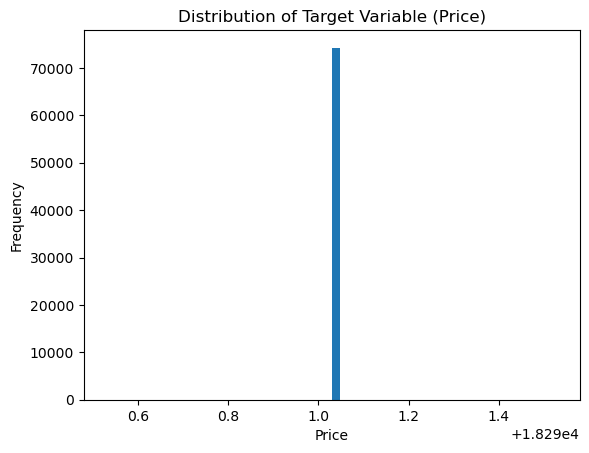

In [36]:
plt.hist(y_pred, bins=50)
plt.title('Distribution of Target Variable (Price)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [39]:
train_dataset = df_dropped_empty_outliers.sample(frac=0.8, random_state=0)
test_dataset = df_dropped_empty_outliers.drop(train_dataset.index)

In [40]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,297110.0,7.311476e+09,4.389990e+06,7.301583e+09,7.308079e+09,7.312589e+09,7.315245e+09,7.317099e+09
region,297110.0,1.944621e+02,1.180934e+02,1.000000e+00,8.300000e+01,1.980000e+02,2.910000e+02,4.040000e+02
price,297110.0,1.827170e+04,1.265960e+04,5.000000e+02,7.650000e+03,1.550000e+04,2.699500e+04,5.825000e+04
year,297110.0,9.973655e+01,1.064051e+01,1.000000e+00,9.700000e+01,1.020000e+02,1.060000e+02,1.110000e+02
manufacturer,297110.0,2.010137e+01,1.211705e+01,1.000000e+00,9.000000e+00,1.600000e+01,3.000000e+01,4.300000e+01
model,297110.0,1.461314e+04,7.059508e+03,0.000000e+00,9.611000e+03,1.474500e+04,2.087300e+04,2.616600e+04
condition,297110.0,1.438195e+00,1.407568e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,6.000000e+00
cylinders,297110.0,3.334445e+00,2.922400e+00,0.000000e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00
fuel,297110.0,3.018808e+00,7.629057e-01,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
odometer,297110.0,9.233273e+04,6.106947e+04,0.000000e+00,3.921900e+04,8.837050e+04,1.352998e+05,2.827390e+05


In [41]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [42]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
id,7.311476e+09,4.389990e+06
region,1.944621e+02,1.180934e+02
price,1.827170e+04,1.265960e+04
year,9.973655e+01,1.064051e+01
manufacturer,2.010137e+01,1.211705e+01
model,1.461314e+04,7.059508e+03
condition,1.438195e+00,1.407568e+00
cylinders,3.334445e+00,2.922400e+00
fuel,3.018808e+00,7.629057e-01
odometer,9.233273e+04,6.106947e+04


In [43]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [44]:
normalizer.adapt(np.array(train_features))

In [45]:
print(normalizer.mean.numpy())

[[7.311e+09 1.945e+02 9.974e+01 2.010e+01 1.461e+04 1.438e+00 3.334e+00
  3.019e+00 9.233e+04 1.116e+00 1.381e+00 1.232e+00 6.201e-01 5.539e+00
  4.721e+00 2.459e+01]]


In [46]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[7.31e+09 1.19e+02 9.60e+01 3.30e+01 1.97e+04 1.00e+00 6.00e+00 3.00e+00
  1.21e+05 1.00e+00 1.00e+00 2.00e+00 3.00e+00 1.20e+01 1.00e+00 4.60e+01]]

Normalized: [[ 0.7  -0.64 -0.35  1.06  0.72 -0.31  0.91 -0.02  0.47 -0.15 -0.5   0.74
   2.25  1.42 -0.81  1.42]]


In [48]:
horsepower = np.array(train_features['odometer'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

C:\Users\omara\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [50]:
horsepower_model.predict(horsepower[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[-0.744],
       [ 1.452],
       [ 1.086],
       [ 2.391],
       [-1.7  ],
       [-0.199],
       [ 0.537],
       [-1.913],
       [-1.427],
       [-1.39 ]], dtype=float32)

In [51]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [53]:
%%time
history = horsepower_model.fit(
    train_features['odometer'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 2.31 s
Wall time: 6min 6s


In [54]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,8077.818848,8074.745117,95
96,8077.813965,8074.732422,96
97,8077.826172,8074.746582,97
98,8077.807617,8074.745117,98
99,8077.806641,8074.748535,99


In [55]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

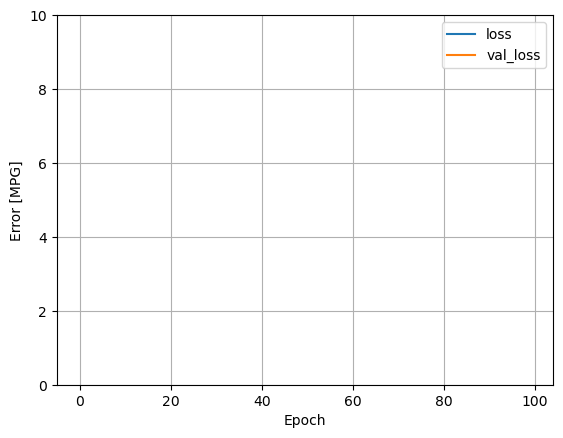

In [58]:
plot_loss(history)

In [60]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['odometer'],
    test_labels, verbose=0)

In [61]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/stepWARNING:tensorflow:5 out of the last 2331 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A367FF9700> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [64]:
def plot_horsepower(x, y):
  plt.scatter(train_features['odometer'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Odometer')
  plt.ylabel('Price')
  plt.legend()

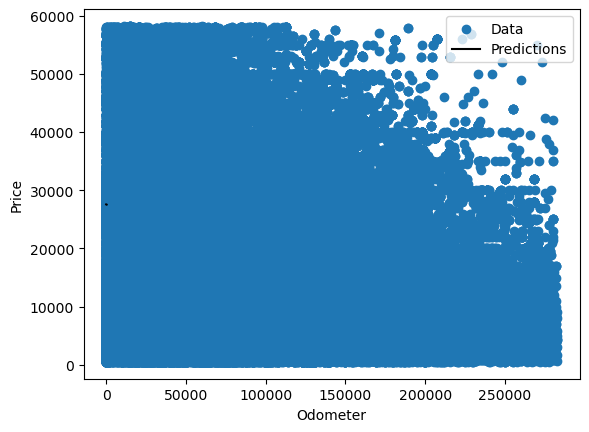

In [65]:
plot_horsepower(x, y)